# load the data and first test the base line 

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random
import numpy as np

/home/milad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

# print the iris data
print(iris.data)


# print the iris data
# print(iris.data)


# print the names of the four features
print(iris.feature_names)


# print integers representing the species of each observation# print 
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [3]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# store feature matrix in "X"# store  
X = iris.data

# store response vector in "y"
y = iris.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [6]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# result of the model  on test data (First step)

In [7]:
#compute the f1 and accuracy

y_pred=mnb.predict(x_test)

print ("f1 on test data is       {}".format(f1_score(y_test, y_pred, average='macro')))
print ("Accuracy on test data is {}".format(accuracy_score(y_test, y_pred)))


f1 on test data is       0.8095238095238096
Accuracy on test data is 0.8666666666666667


In [8]:
#3 change for 10 percentage less accuracy
print(y_test[:10])
print(y_pred[:10])
y_pred[:10]= [0,1,1,0,1,1,1,0,0,1]

print ("Accuracy on test data is {}".format(accuracy_score(y_test, y_pred)))

[2 0 2 2 2 1 1 0 0 2]
[2 0 1 2 1 1 1 0 0 1]
Accuracy on test data is 0.7666666666666667


# result model on the same train data

In [50]:
y_pred_train=mnb.predict(x_train)


print ("f1 on same train data is       {}".format(f1_score(y_train, y_pred_train, average='macro')))
print ("Accuracy on same train data is {}".format(accuracy_score(y_train, y_pred_train)))
print("\n" + classification_report(y_train, y_pred_train))


print(confusion_matrix(y_train, y_pred_train))


f1 on same train data is       0.8777540867093107
Accuracy on same train data is 0.875

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.75      1.00      0.86        45
          2       1.00      0.63      0.78        41

avg / total       0.91      0.88      0.87       120

[[34  0  0]
 [ 0 45  0]
 [ 0 15 26]]


# base line
- change one feature and chek the target (change function)
- change randomly one value and check the target(change random)

In [35]:
def change(x_train,y_train,percetage,mnb):
    
    number_change = int(percetage/100*x_train.shape[0])
    print(number_change)
    
    x_train_changed = np.copy(x_train)

    for count,ele in enumerate(x_train_changed[:number_change]):
        print(x_train[count],y_train[count])
        for i in range(4):
            x_train_changed[count][i] = 0

            if (y_train[count] != mnb.predict([x_train_changed[count]])):
                break
            else:
                x_train_changed[count]= np.copy(x_train[count])

        print(x_train_changed[count],mnb.predict([x_train_changed[count]])[0])
        print(" \n change number {} \n".format(count))

    return np.copy(x_train_changed)

In [36]:
# new=change(x_train,y_train,20.8,mnb)
new=change(x_test,y_test,20,mnb)


6
[ 6.4  2.8  5.6  2.1] 2
[ 6.4  2.8  0.   2.1] 1
 
 change number 0 

[ 5.7  3.8  1.7  0.3] 0
[ 5.7  0.   1.7  0.3] 1
 
 change number 1 

[ 7.4  2.8  6.1  1.9] 2
[ 7.4  2.8  0.   1.9] 0
 
 change number 2 

[ 7.6  3.   6.6  2.1] 2
[ 7.6  3.   0.   2.1] 0
 
 change number 3 

[ 7.3  2.9  6.3  1.8] 2
[ 7.3  2.9  0.   1.8] 0
 
 change number 4 

[ 6.   2.9  4.5  1.5] 1
[ 0.   2.9  4.5  1.5] 2
 
 change number 5 



# result model on the dirty data (10 %)

In [37]:
y_pred_train_changed=mnb.predict(new)


# print ("f1 on same train data is       {}".format(f1_score(y_train, y_pred_train_changed, average='macro')))
# print ("Accuracy on same train data is {}".format(accuracy_score(y_train, y_pred_train_changed)))


print ("f1 on same train data is       {}".format(f1_score(y_test, y_pred_train_changed, average='macro')))
print ("Accuracy on test data is {}".format(accuracy_score(y_test, y_pred_train_changed)))

f1 on same train data is       0.6530920060331825
Accuracy on test data is 0.7333333333333333


In [16]:
def change_random(x_train,y_train,percetage,mnb):
    number_change_requested = int(percetage/100*x_train.shape[0])
    
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    row_history=[]
    col_history=[]
    
    x_train_changed_random = np.copy(x_train)
  
    for i in range(number_change_requested):
              
        row = random.randint(1, x_train.shape[0])
        col = random.randint(0,x_train.shape[1]-1)

        while (row in row_history) or (col in col_history):
            
            row = random.randint(1, x_train.shape[0])
            col = random.randint(0,x_train.shape[1]-1)
        row_history.append(row)
        col_history.append(col)


        print("row {}   value {} {}".format(row,x_train[row],y_train[row]))
        
        while(y_train[row] == mnb.predict([x_train_changed_random[row]])):
            x_train_changed_random[row] = np.copy(x_train[row])
            x_train_changed_random[row][col]=0
            col = random.randint(0,x_train.shape[1]-1)
                
            
        print("row {}   value {} {}".format(row,x_train_changed_random[row],mnb.predict([x_train_changed_random[row]])[0]))
#         print('"""""""""""""""""')
        print(" \n change number {} \n".format(i))
        col_history=[]
    return np.copy(x_train_changed_random)
         



In [21]:
new_random=change_random(x_test,y_test,20,mnb)

20 percentage error is equal to 6 change 

row 21   value [ 6.7  3.3  5.7  2.1] 2
row 21   value [ 6.7  3.3  5.7  0. ] 1
 
 change number 0 

row 28   value [ 5.4  3.4  1.7  0.2] 0
row 28   value [ 5.4  0.   1.7  0.2] 1
 
 change number 1 

row 23   value [ 5.   3.4  1.6  0.4] 0
row 23   value [ 0.   3.4  1.6  0.4] 1
 
 change number 2 

row 27   value [ 5.4  3.9  1.3  0.4] 0
row 27   value [ 5.4  0.   1.3  0.4] 1
 
 change number 3 

row 15   value [ 4.9  3.1  1.5  0.1] 0
row 15   value [ 4.9  0.   1.5  0.1] 1
 
 change number 4 

row 10   value [ 5.   3.   1.6  0.2] 0
row 10   value [ 5.   0.   1.6  0.2] 1
 
 change number 5 



# result model on the dirty data (10 %) -random

In [22]:
y_pred_test_changed_random=mnb.predict(new_random)


# print ("f1 on same train data is       {}".format(f1_score(y_train, y_pred_train_changed_random, average='macro')))
# print ("Accuracy on same train data is {}".format(accuracy_score(y_train, y_pred_train_changed_random)))


print ("f1 on same train data is       {}".format(f1_score(y_test, y_pred_train_changed_random, average='macro')))
print ("Accuracy on same train data is {}".format(accuracy_score(y_test, y_pred_train_changed_random)))

f1 on same train data is       0.6433998100664767
Accuracy on same train data is 0.6666666666666666


# find the most important features

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#knn = KNeighborsClassifier(n_neighbors=4)
mnb2 = MultinomialNB()
# sfs1 = SFS(knn, 
#            k_features=1, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=0)
sfs1 = SFS(mnb, 
#            k_features=1, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)






sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2018-10-03 15:35:05] Features: 1/1 -- score: 0.333333333333

In [40]:
sfs1.subsets_


{1: {'avg_score': 0.33333333333333331,
  'cv_scores': array([ 0.33333333]),
  'feature_idx': (0,)}}

# most important feature

In [41]:
sfs1.k_feature_idx_

(0,)

In [43]:
def change_spetial_feature(x_train,y_train,percetage,mnb,feature):
    change_item=0
    number_change_spetial = int(percetage/100*x_train.shape[0])
    print(number_change_spetial)
    
    x_train_changed_spetial = np.copy(x_train)

    for count,ele in enumerate(x_train_changed_spetial):
        

        x_train_changed_spetial[count][feature] = 0

        if (y_train[count] != mnb.predict([x_train_changed_spetial[count]])):
            change_item=change_item+1
            if (change_item < number_change_spetial):

                print(x_train[count],y_train[count])
                print(x_train_changed_spetial[count],mnb.predict([x_train_changed_spetial[count]])[0])
                print(" \n change number {} \n".format(change_item))
            else:

                break
        else:
            x_train_changed_spetial[count]= np.copy(x_train[count])

    return np.copy(x_train_changed_spetial)

In [46]:
new_random_spetial=change_spetial_feature(x_test,y_test,20,mnb,0)

6
[ 6.   2.9  4.5  1.5] 1
[ 0.   2.9  4.5  1.5] 2
 
 change number 1 

[ 6.   2.7  5.1  1.6] 1
[ 0.   2.7  5.1  1.6] 2
 
 change number 2 

[ 5.   3.   1.6  0.2] 0
[ 0.   3.   1.6  0.2] 1
 
 change number 3 

[ 6.1  2.9  4.7  1.4] 1
[ 0.   2.9  4.7  1.4] 2
 
 change number 4 

[ 5.   2.   3.5  1. ] 1
[ 0.   2.   3.5  1. ] 2
 
 change number 5 



# result model on the dirty data (10 %) -spetial feature

In [47]:
y_pred_train_changed_spetial=mnb.predict(new_random_spetial)


# print ("f1 on same train data is       {}".format(f1_score(y_train, y_pred_train_changed_spetial, average='macro')))
# print ("Accuracy on same train data is {}".format(accuracy_score(y_train, y_pred_train_changed_spetial)))

print ("f1 on same train data is       {}".format(f1_score(y_test, y_pred_train_changed_spetial, average='macro')))
print ("Accuracy on same train data is {}".format(accuracy_score(y_test, y_pred_train_changed_spetial)))

f1 on same train data is       0.5518518518518519
Accuracy on same train data is 0.6666666666666666


In [48]:
co=0
for count1,ele1 in enumerate(new_random_spetial):
    if ele1[0]==0:
        co=co+1
        print(new_random_spetial[count1])
print(co)

[ 0.   2.9  4.5  1.5]
[ 0.   2.7  5.1  1.6]
[ 0.   3.   1.6  0.2]
[ 0.   2.9  4.7  1.4]
[ 0.   2.   3.5  1. ]
[ 0.   3.4  1.9  0.2]
6


In [95]:
def max_indices(arr, k):
    '''
    Returns the indices of the k first largest elements of arr
    (in descending order in values)
    '''
    assert k <= arr.size, 'k should be smaller or equal to the array size'
    arr_ = arr.astype(float)  # make a copy of arr
    max_idxs = []
    for _ in range(k):
        max_element = np.max(arr_)
        if np.isinf(max_element):
            break
        else:
            idx = np.where(arr_ == max_element)
        max_idxs.append([int(idx[0]),int(idx[1])])
        arr_[idx] = -np.inf
    return max_idxs

In [96]:
max_indices(array,4)

[[1, 1], [0, 0], [2, 2], [2, 1]]

In [103]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def change_confuation_matrix(x_train,mnb):
    y_pred_train=mnb.predict(x_train)
    array=confusion_matrix(y_train, y_pred_train)
    
    max_list = max_indices(array,4)
    rong_class= max_list[array.shape[0]]
     
    
    print("the data point of class {} wrongly classify as class {}".format(rong_class[0],rong_class[1]))
    df_cm = pd.DataFrame(array, range(array.shape[0]),range(array.shape[0]))
    
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
    

the data point of class 2 wrongly classify as class 1


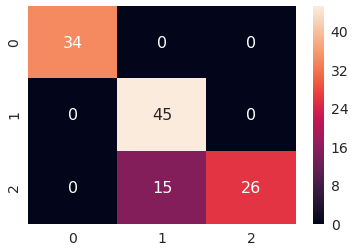

In [104]:
change_confuation_matrix(x_train,mnb)

Confusion matrix, without normalization
[[34  0  0]
 [ 0 45  0]
 [ 0 15 26]]


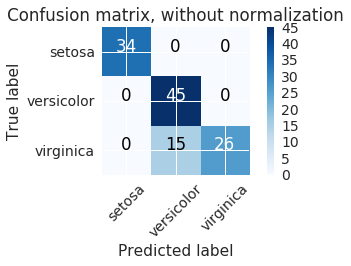

<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[ 0.94  0.06  0.  ]
 [ 0.    1.    0.  ]
 [ 0.22  0.44  0.33]]


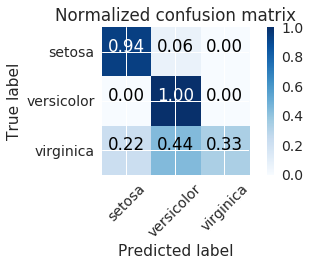

<Figure size 432x288 with 0 Axes>

In [64]:
array=confusion_matrix(y_train, y_pred_train)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.figure()
    plt.show()
    
    
    
    
    

class_names = iris.target_names
plot_confusion_matrix(array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

